### Eksik Veri Yapısının Görselleştirilmesi

In [1]:
# silmenin doğru mu değil mi olduğunu görmek için, rassalık durumuna bakmak gerekiyor. Bunun için de 
# verinin görselleştirilmesi işlemini yapmalı.

In [3]:
!pip install missingno

In [4]:
import missingno as msno

In [5]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}
) 
#3 adet numpy array oluşturup, bunlardan bir dataframe oluşturduk.
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


<AxesSubplot:>

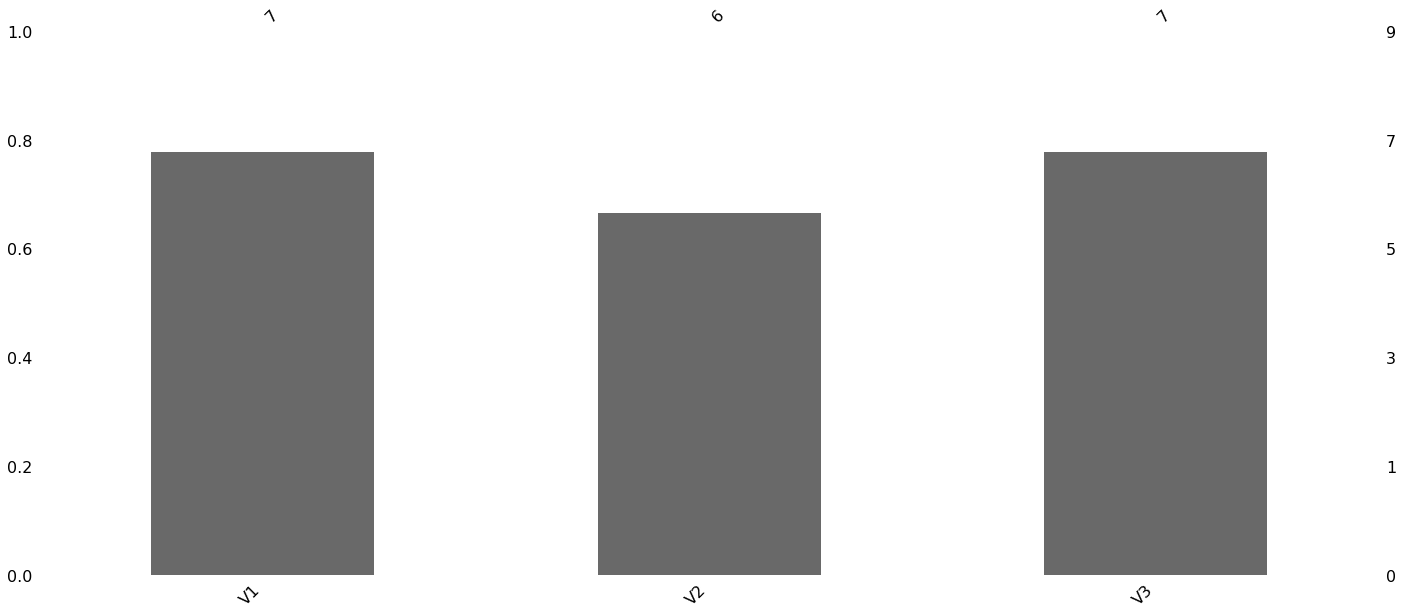

In [6]:
msno.bar(df) #solda yüzdelik olarak tam olmasını gösteriyor, sağdaki de dolu kaç adet veri var gösteriyor.

<AxesSubplot:>

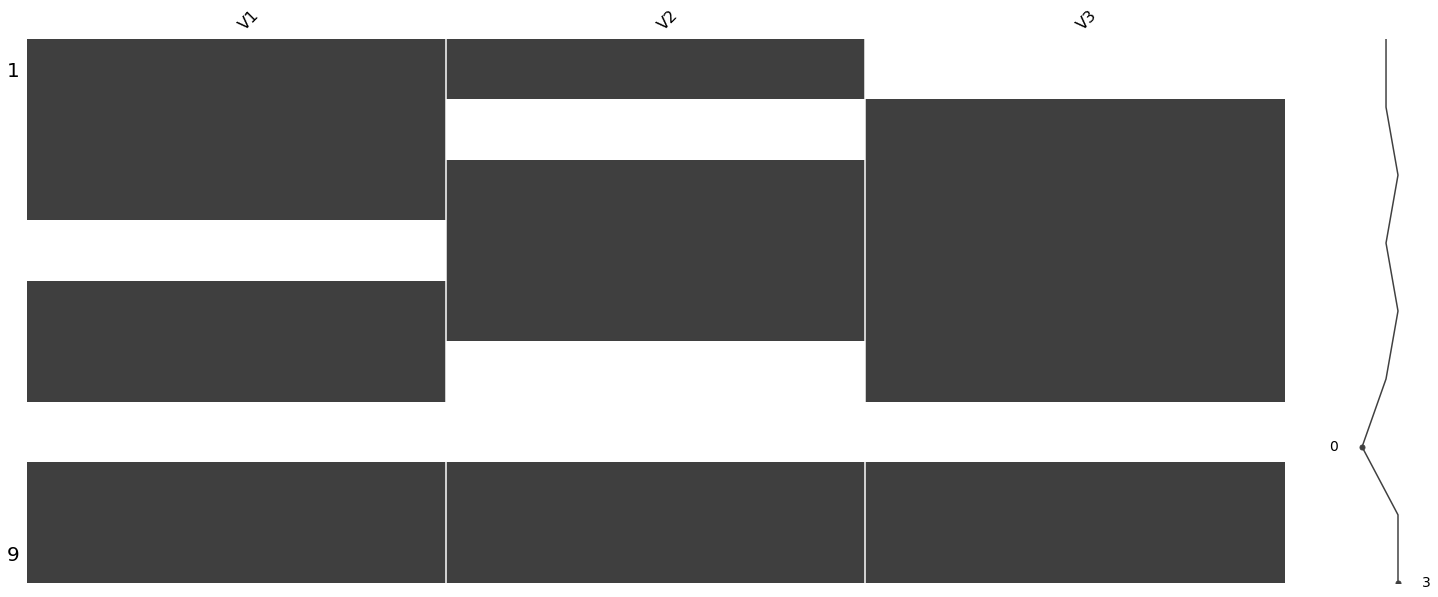

In [7]:
msno.matrix(df) #bu grafikte, bahsetmiş olduğumuz eksik değerlerin rassallığı ile ilgili gerekli yapısal bozuklukları yakalayabilme imkanı veren
# bir görsel. bu grafik ne diyor? soldaki eksen gözlem birimlerini ifade ediyor. 1.gözlem 2. gözlem .... 9. gözlem gibi
# mesela 6.gözlemin tamamı boş. sağ taraftaki gözlem, 0-3 değereleri var. 3 olanlar, 3 tanesi aynı anda dolu demek. mesela 6.gözlem için bu değer
# 0.

In [8]:
# yukarıdaki basit bir veriseti için görelleştirme idi. Şimdi daha çok gözlemli veriseti için bunu gerçekleştirelim.

In [9]:
import seaborn as sns
df2 = sns.load_dataset("planets") #gezegenlerle, galaksilerle ilgili bazı bilgileri içeren bir dataset
df2.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [11]:
df2.isnull().sum() #bazı verilerde ciddi eksiklikler var. şimdi bunları silmeye ya da bazı yöntemlerler doldurmaya karar vermek istiyoruz.

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

<AxesSubplot:>

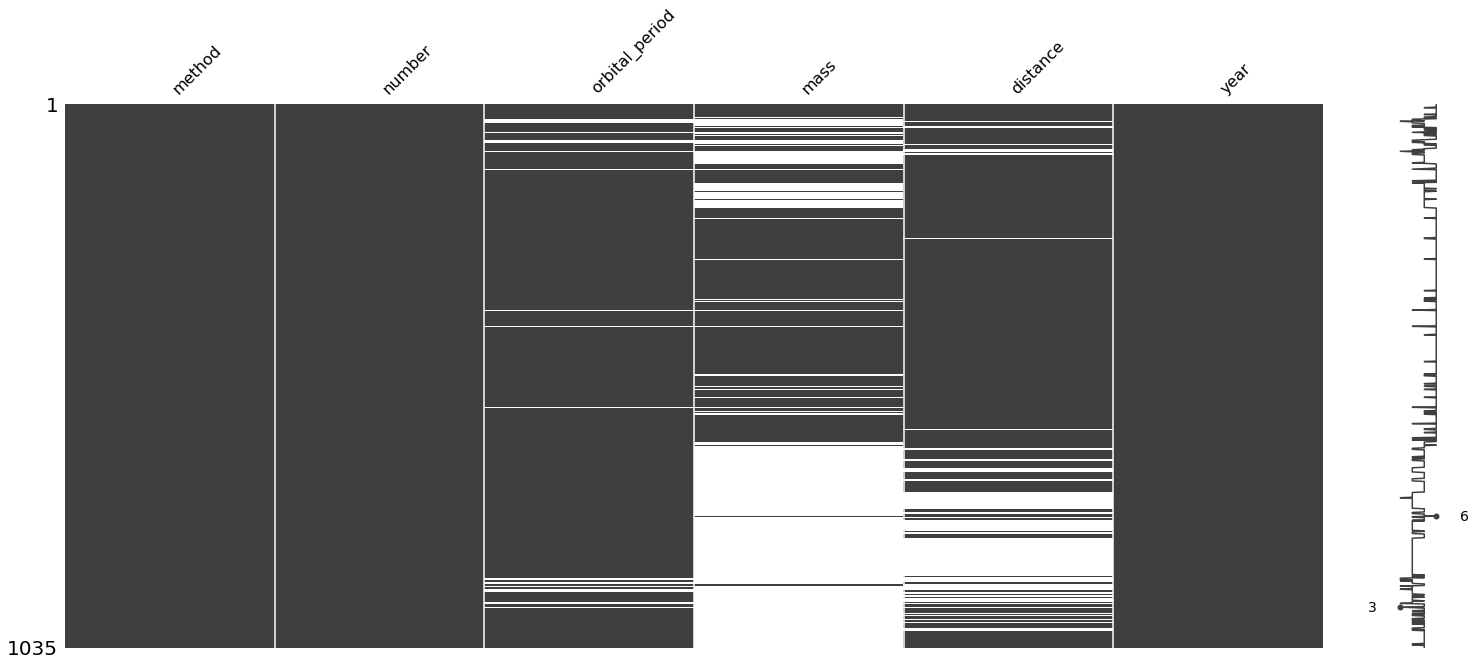

In [12]:
msno.matrix(df2) #önce rassallığına bakacağız

In [13]:
# şimdi burada teknik olarak yapısal bir problem var mı yok mu nasıl anlayacağız? önce orbital perioda odaklanalım.boşluklar odaklanalım. 
# mesela orbitak periodda ne zaman bir eksiklik gözlense, massta da bir eksiklik gözlenmiş. yani orbital-period ile mass arasında bir ilişki var
# yani masstaki eksikliklerin bazıları orbital perioda bağlı olarak gerçekleşmiş. yani bağımlı olarak gerçekleşmiş.
# şimdi masstan distance a inceleyelim: mass ile distance arasında çok ciddi bir ilişki var gibi gözükmüyor. Ama bir mitar bapımlılık var gibi.
# VARILAN SONUÇ: rassallığı inceliyorduk ve görünen o ki, değişkenler arasında ciddi bir bağımlılık söz konusu ve 
# eksik değerlerin rastgele OLUŞMADIĞI yorumunu yapıyoruz.

<AxesSubplot:>

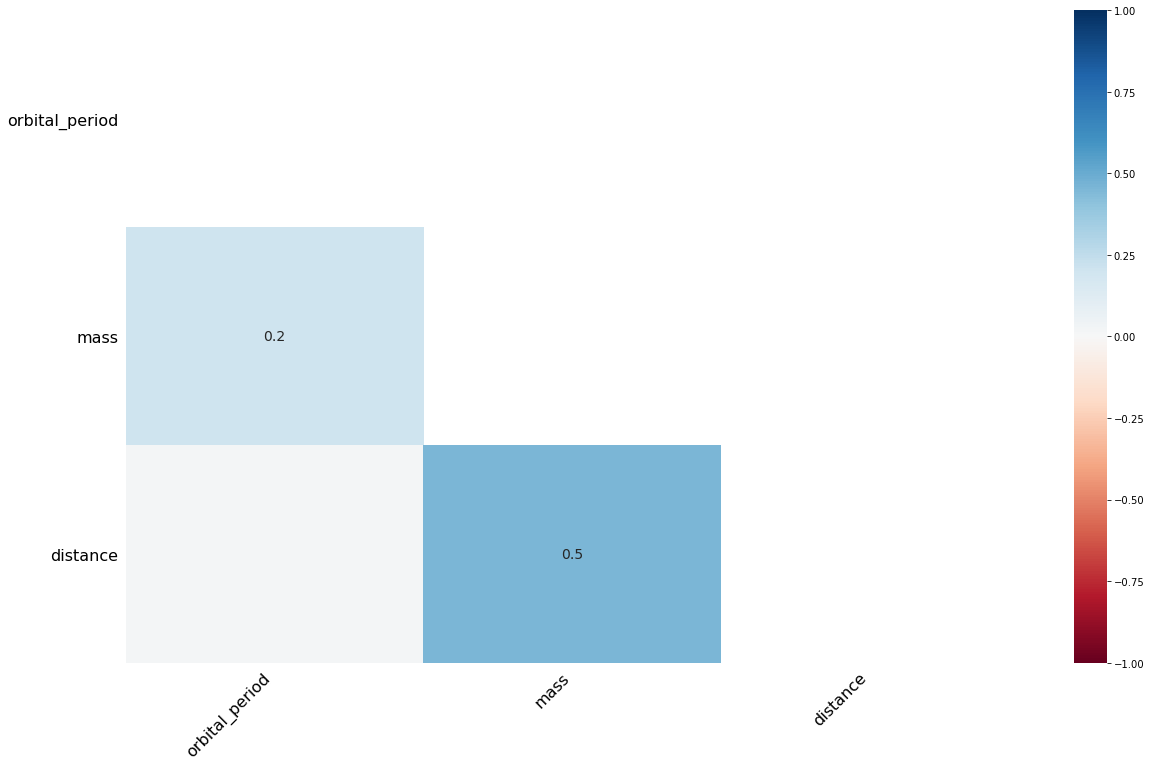

In [15]:
msno.heatmap(df2) #heatmap: ısı haritası eksikliği değerlendirmek için bir yöntem olarak kullanacağız.

In [ ]:
# ne anlatıyor? ısı haritası bize, nullity correlation isminde bir korelasyon değeri verir. bu değerler -1+1 arasında yer alır. 
# korelasyon: ilişki anlamına gelir. nullity: boşluk-eksikliği ifade ediyor. yani eğer değişkenlerin arasındaki boşluk korelasyonu gibi bir
# korelason varsa elimizde, bu değişkenlerin birbirlerine olan bağımlılıklarını, yani eksikliğin rassal olarak oluşmama durumunu, 
# bize nümerik olarak ifade eden bir gösterim. Yorumlayalım:
# distance-mass değişkeni arasında, 0.5 şeklinde bir korelasyon var. eğer, iki değişkenin nullity correlation değeri 1 ise, bu iki değişkenin
# eksikliği çok yüksek korelasyonla birlikte, birlikte meydana geliyor demektir. bir değişkende ekisklik görürseniz, çok yüksek ihtimalle
# diğerinde de göreceksiniz demektir. eğer nullity correlation 0 ise, aralarında birbirini etkileyen bir korelasyon yoktur.
# VARILAN SONUÇ: mass ile distance değişkeni arasında, nullity correlation değeri incelendiğinde orta şiddetli bir korelasyon olduğu görülür.
# bu veriseti rassal bir eksikliğe sahip değildir. yani burada direkt doldurma ya da direkt silme işlemi yapmak, 
# beraberinde problemleri de getirecektir.